<h1><span style="color:red" font-weight: bold><center>   Compte rendu Tp2:   Segmentation</center> </span></h1>

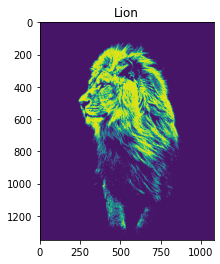

In [16]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('C:/Users/HP/Desktop/sauvgarde/Sauvegarde inese/Desktop/INES/DM-master/Segmentation/lion.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('Lion')
plt.show()

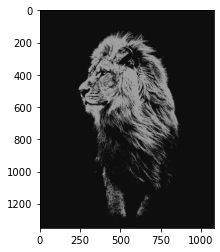

In [17]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
image = cv2.imread('C:/Users/HP/Desktop/sauvgarde/Sauvegarde inese/Desktop/INES/DM-master/Segmentation/lion.jpg')
image = cv2.imread('lion.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))
    
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('lion.jpg', quant)
plt.imshow(image)

cv2.imread('lion2.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

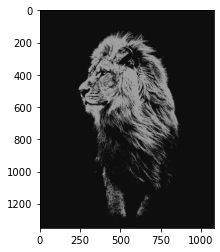

In [18]:
plt.imshow(image)

In [19]:
!pip install opencv-python

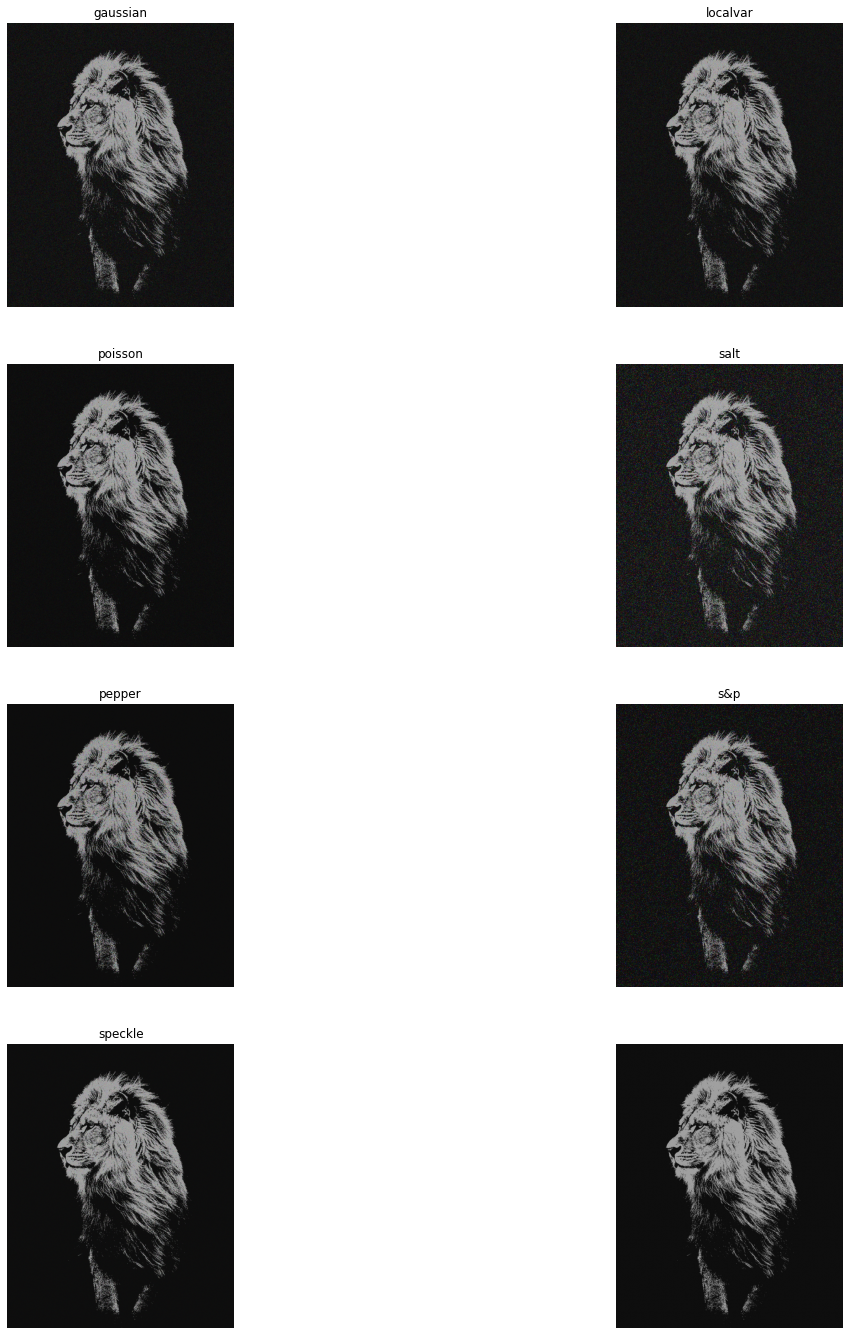

In [20]:
import skimage
import matplotlib.pyplot as plt



img_path="lion2.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(20,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


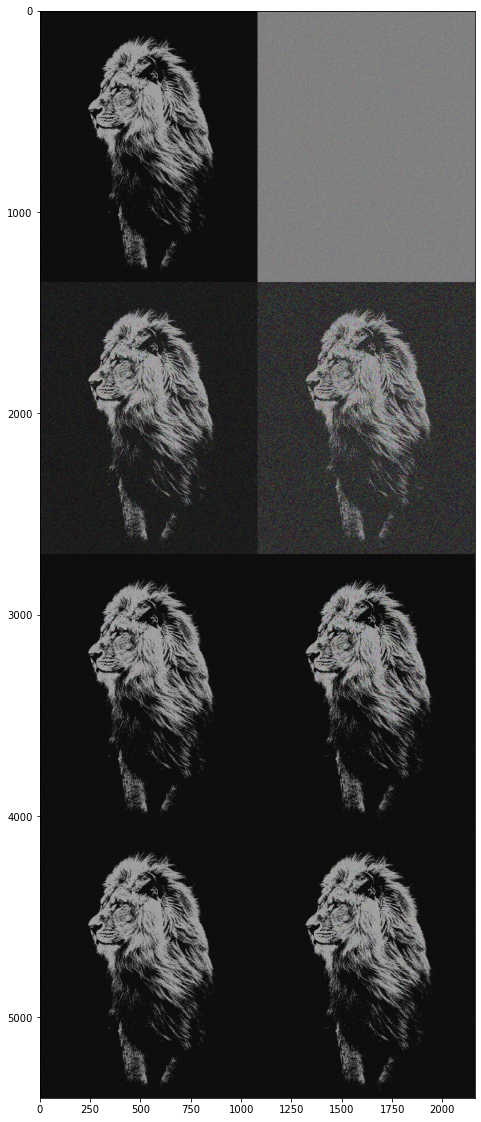

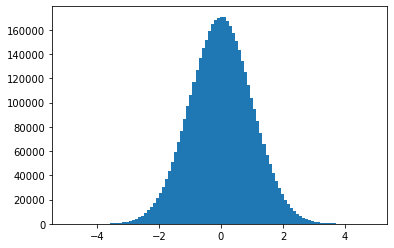

In [21]:
import cv2
img_path="lion.jpg"
img = cv2.imread(img_path)[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))



plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()


In [24]:
from PIL import Image
im=Image.open("lion.jpg")
im = im.convert('L')

for i in range(2,im.size[0]-2):
    for j in range(2,im.size[1]-2):
        b=[]
        if im.getpixel((i,j))>0 and im.getpixel((i,j))<255:
            pass
        elif im.getpixel((i,j))==0 or im.getpixel((i,j))==255:
            c=0
            for p in range(i-1,i+2):
                for q in range(j-1,j+2):
                    if im.getpixel((p,q))==0 or im.getpixel((p,q))==255: 
                        c=c+1
            if c>6:
                c=0
                for p in range(i-2,i+3):
                    for q in range(j-2,j+3):
                        b.append(im.getpixel((p,q)))
                        if im.getpixel((p,q))==0 or im.getpixel((p,q))==255:
                            c=c+1
                if c==25:
                    a=sum(b)/25
                    im.putpixel((i,j),a)
                else:
                    p=[]
                    for t in b:
                        if t not in (0,255):
                            p.append(t)
                    p.sort()
                    im.putpixel((i,j),p[len(p)/2])
            else:
                b1=[]
                for p in range(i-1,i+2):
                    for q in range(j-1,j+2):
                        b1.append(im.getpixel((p,q)))
                im.putpixel((i,j),sum(b1)/9)

im.save("nonoise.jpg") 


In [25]:
import numpy as np
import cv2
#import tensorflow as tf
from PIL import Image
import os
import scipy.signal as signal

input_images = np.zeros((300, 300))
filename = "lion.jpg"
print(filename)
img = Image.open(filename).resize((300, 300)).convert('L')
width = img.size[0]
height = img.size[1]

for h in range(0, height):
    for w in range(0, width):
        if img.getpixel((h, w)) < 128:
            input_images[w, h] = 0
        else:
            input_images[w, h] = 1
cv2.imshow("test1111", input_images)

data = signal.medfilt2d(np.array(img), kernel_size=3)  # Dimensional median filter
for h in range(0, height):
    for w in range(0, width):
        if data[h][w] < 128:
            input_images[w, h] = 0
        else:
            input_images[w, h] = 1
cv2.imshow("test2222", input_images)

data = signal.medfilt2d(np.array(img), kernel_size=5)  # Dimensional median filter
for h in range(0, height):
    for w in range(0, width):
        if data[h][w] < 128:
            input_images[w, h] = 0
        else:
            input_images[w, h] = 1
cv2.imshow("test3333", input_images)
cv2.waitKey(0)

lion.jpg


-1